### **Task 2**

**Description**: Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Data Cleaning**

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Nityanand Singh/Titanic/train.csv')

In [4]:
df.duplicated().sum()

0

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
age_median = df['Age'].median()

In [7]:
df['Age'].fillna(age_median, inplace=True)
Cabin_mode = df['Cabin'].mode()[0]
df['Cabin'].fillna(Cabin_mode, inplace=True)
Embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(Embarked_mode, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,891.0,29.361582,13.019697,0.42,22.0000,28.0000,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
df.describe(include="O").T

,count,unique,top,freq
Name,891,891,"Braund, Mr. Owen Harris",1
Sex,891,2,male,577
Ticket,891,681,347082,7
Cabin,891,147,B96 B98,691
Embarked,891,3,S,646


### **EDA**

In [11]:
df.shape

(891, 12)

In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
age_counts = df['Sex'].value_counts().reset_index().rename(columns = {'index' : 'Sex' , 'Sex' : 'count'})
age_counts

,Sex,count
0,male,577
1,female,314


In [15]:
sibsp_counts = df['SibSp'].value_counts().reset_index().rename(columns = {'index' : 'SibSp' , 'SibSp' : 'count'})
sibsp_counts

,SibSp,count
0,0,608
1,1,209
2,2,28
3,4,18
4,3,16
5,8,7
6,5,5


In [16]:
Parch_counts = df['Parch'].value_counts().reset_index().rename(columns = {'index' : 'Parch' , 'Parch' : 'count'})
Parch_counts

,Parch,count
0,0,678
1,1,118
2,2,80
3,5,5
4,3,5
5,4,4
6,6,1


### **Visualization**

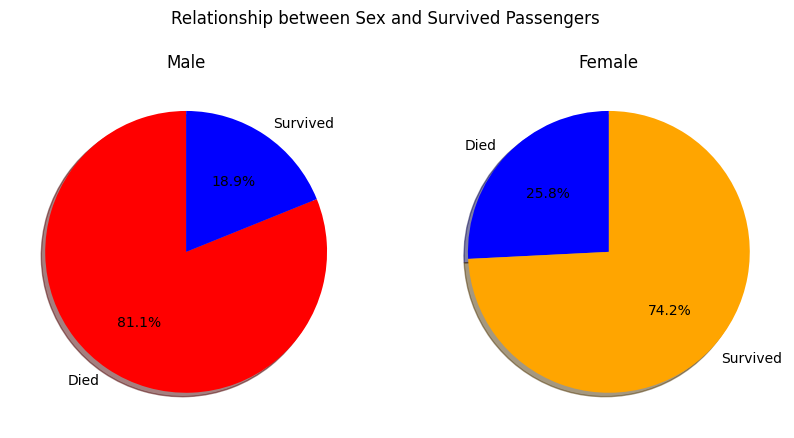

In [17]:
grouped = df.groupby(['Sex', 'Survived']).size()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].pie(grouped['male'], labels=['Died', 'Survived'], autopct='%1.1f%%', shadow=True, startangle=90,colors=['red','blue'])
axes[0].set_title('Male')
axes[1].pie(grouped['female'], labels=['Died', 'Survived'], autopct='%1.1f%%', shadow=True, startangle=90,colors=['blue','orange'])
axes[1].set_title('Female')
fig.suptitle('Relationship between Sex and Survived Passengers')
plt.show()


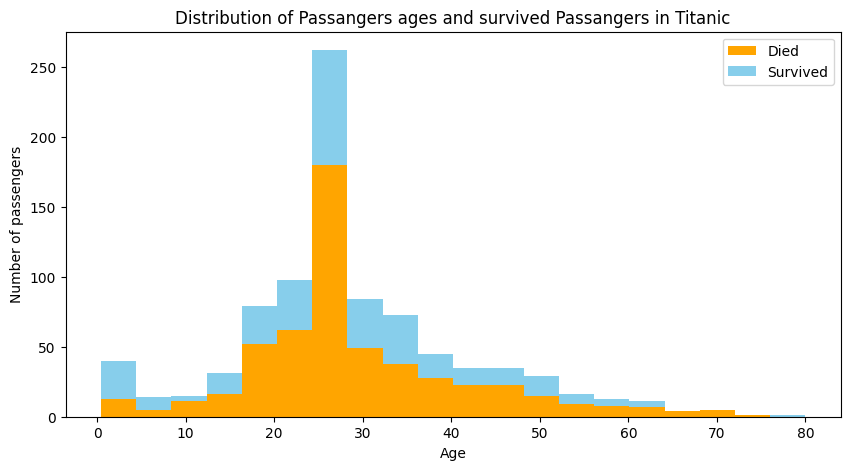

In [18]:
ig, ax = plt.subplots(figsize=(10, 5))

ax.hist([df["Age"][df["Survived"] == 0], df["Age"][df["Survived"] == 1]], bins=20, label=["Died", "Survived"], color=["orange", "skyblue"], stacked=True)

ax.set_xlabel("Age")
ax.set_ylabel("Number of passengers")
ax.set_title("Distribution of Passangers ages and survived Passangers in Titanic")
ax.legend()

plt.show()

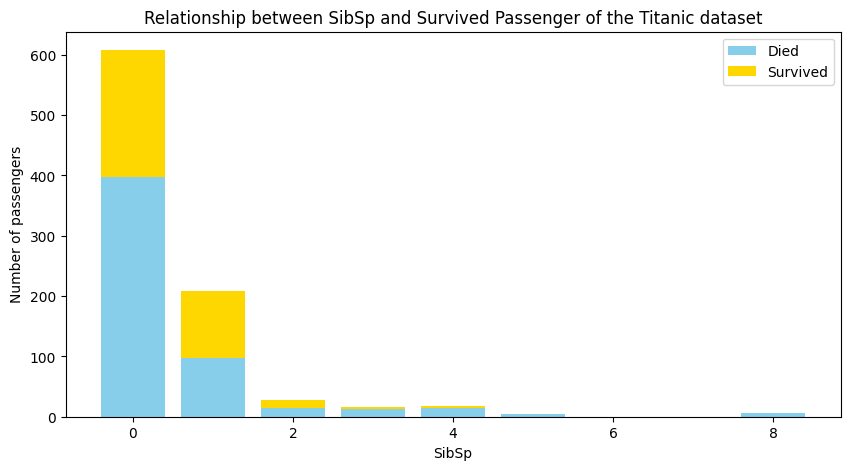

In [19]:
grouped = df.groupby(["SibSp", "Survived"])["PassengerId"].count().reset_index()

pivoted = grouped.pivot(index="SibSp", columns="Survived", values="PassengerId").fillna(0)

fig, ax = plt.subplots(figsize=(10, 5))

bars = ax.bar(pivoted.index, pivoted[0], label="Died", color="skyblue")
bars2 = ax.bar(pivoted.index, pivoted[1], label="Survived", color="gold", bottom=pivoted[0])

ax.set_xlabel("SibSp")
ax.set_ylabel("Number of passengers")
ax.set_title("Relationship between SibSp and Survived Passenger of the Titanic dataset")
ax.legend()

plt.show()

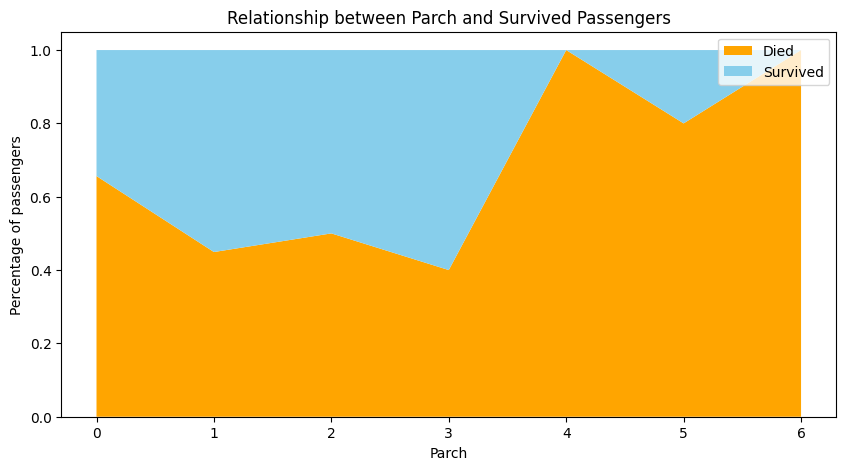

In [20]:
grouped = df.groupby(["Parch", "Survived"])["PassengerId"].count().reset_index()

pivoted = grouped.pivot(index="Parch", columns="Survived", values="PassengerId").fillna(0)
normalized = pivoted.div(pivoted.sum(axis=1), axis=0)

fig, ax = plt.subplots(figsize=(10, 5))

ax.stackplot(normalized.index, normalized[0], normalized[1], labels=["Died", "Survived"], colors=["orange", "skyblue"])

ax.set_xlabel("Parch")
ax.set_ylabel("Percentage of passengers")
ax.set_title("Relationship between Parch and Survived Passengers")
ax.legend()

plt.show()


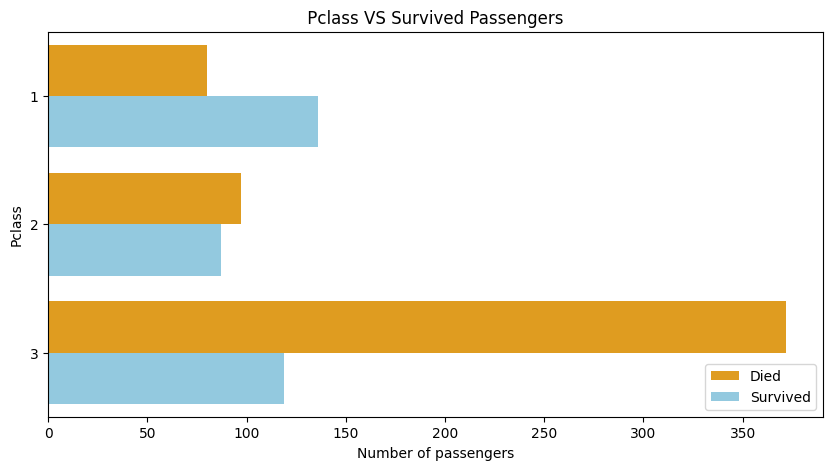

In [21]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(data=df, y="Pclass", hue="Survived", palette=["orange", "skyblue"], ax=ax)

ax.set_xlabel("Number of passengers")
ax.set_ylabel("Pclass")
ax.set_title(" Pclass VS Survived Passengers ")
ax.legend(["Died", "Survived"], loc="lower right")

plt.show()

In [22]:
fig = plt.figure(figsize=(12,6))
fig = px.sunburst(df, path=['Embarked', 'Survived'], color='Survived', color_discrete_map={0:'blue', 1:'red'})
fig.update_layout(title='Survival Rate by Embarkation Port', title_x=0.5, width=400, height=400, margin=dict(l=50, r=50, b=50, t=50))
fig.update_traces(textinfo='label+percent parent')
fig.show()

<Figure size 1200x600 with 0 Axes>

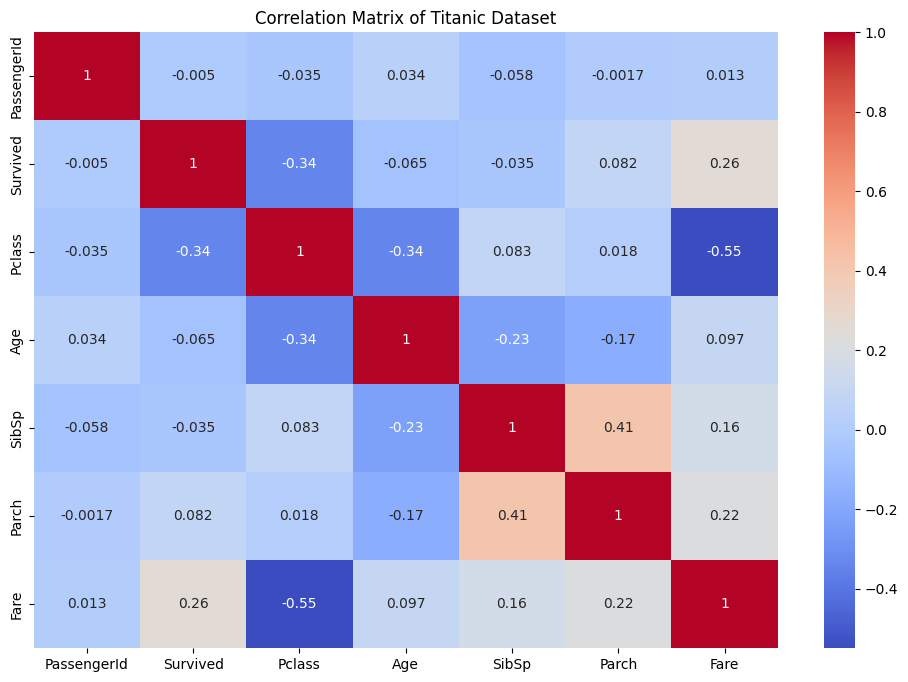

In [23]:
numerical_columns = df.select_dtypes(include=['float64', 'int64'])  # Select only numerical columns
corr = numerical_columns.corr()

fig = plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Titanic Dataset')
plt.show()